# Interactive Analysis
## Imports & Constants

In [4]:
import numpy as np
import pandas as pd
from pandas.core import datetools
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from textstat.textstat import textstat
import pprint, math, datetime, pandas.tseries

from tools.utilities import compose, identity
from tools.grouping import question_type, has_negation, concrete_score, concrete_score_avg, is_viral

%matplotlib inline
%run -i tools/datajson.py
# Ensures higher quality graphs!
%config InlineBackend.figure_format = 'retina'

In [5]:
# File Names
NAMES = ['2017-10-02', '2017-10-06', '2017-10-16', '2017-10-25', '2017-11-01', 
        '2017-11-13', '2017-11-18', '2017-11-25', '2017-12-06', '2017-12-16',
        '2017-12-25', '2018-01-04']
CURRENTS = ['../private/output/' + name + '.txt' for name in NAMES]

# Lists
SUBJECTS = ['Mathematics', 'Biology', 'Economics', 'Culture', 'Chemistry',
            'Physics', 'Engineering', 'Technology', 'Repost', 'Other']
Q_TYPES = ['How', 'Why', 'What', 'When']
NEGATION = ['Positive', 'Negative']

##  Load
The concreteness of a question is defined by the function `concrete_score` is the sum of the concrete scores of each of the words, if available in the database. The `concrete_score_avg` function controls for the number of words by normalizing or averaging the number of words which are counted.

In [6]:
# Collects (parses) posts and displats size
collected_posts = RedditDataJSON.from_filenames(CURRENTS)
raw_scores = {post['title']: int(post['score']) for post in collected_posts.posts}
score_distribution = [int(post['score']) for post in collected_posts.posts]
collected_posts.size

(1200, 3)

## Simple Graphs
A series of examples which highlight the possible graphsusing the `RedditJSONData` Class.

DescribeResult(nobs=1200, minmax=(4, 27359), mean=748.495, variance=8037528.7405921612, skewness=5.083869893122469, kurtosis=29.3515671616886)


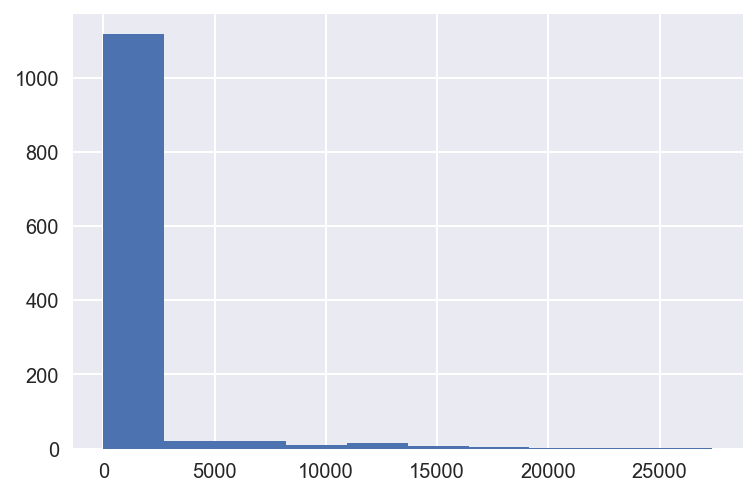

In [7]:
# Score distributions
stdev = np.std(score_distribution)
mean = np.mean(score_distribution)
print(stats.describe(score_distribution))

plt.hist(score_distribution)
plt.show()

# Threshold
VIRAL_THRESHOLD = mean + 0.5 * stdev

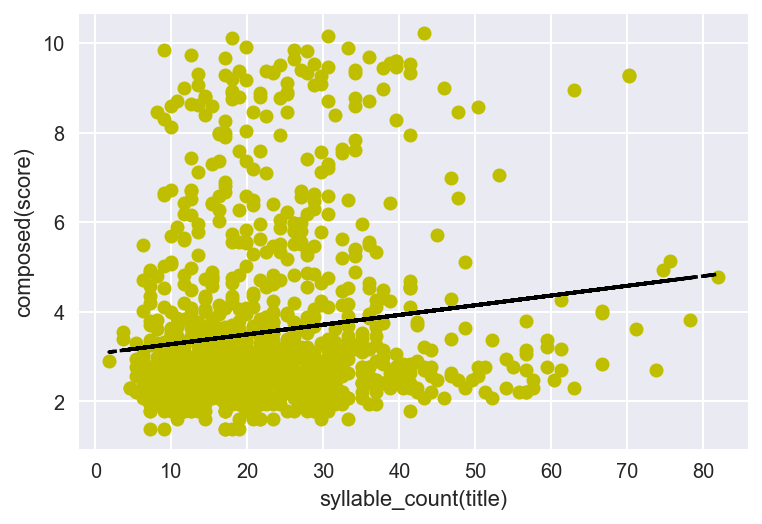

{'r_squared': 0.017472685459915368}


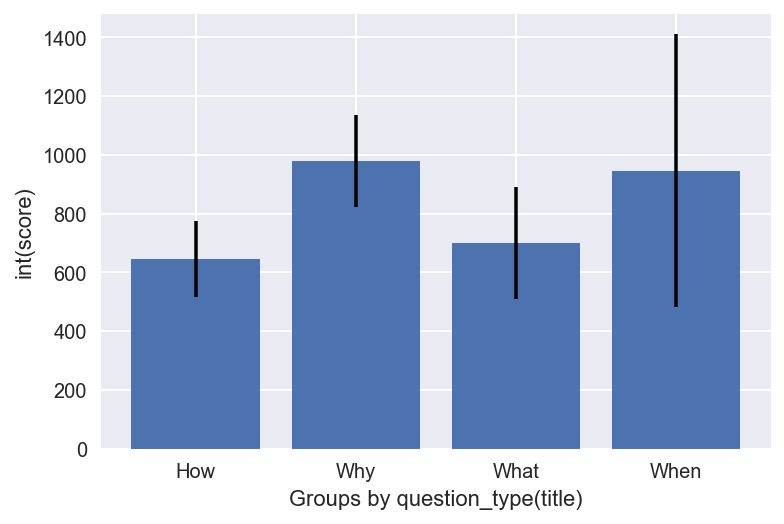

{'anova_f': 1.0310805919478907,
 'errors': [128.38542381360944,
            156.22773165254492,
            189.53065895095153,
            464.544946052966],
 'maxs': [27359, 25541, 14075, 4709],
 'means': [644.45432692307691,
           978.57928118393238,
           699.84210526315792,
           945.38461538461536],
 'mins': [4, 4, 4, 11],
 'p-value': 0.37792328182678769,
 'sizes': [416, 473, 171, 13],
 'vars': ['How', 'Why', 'What', 'When']}


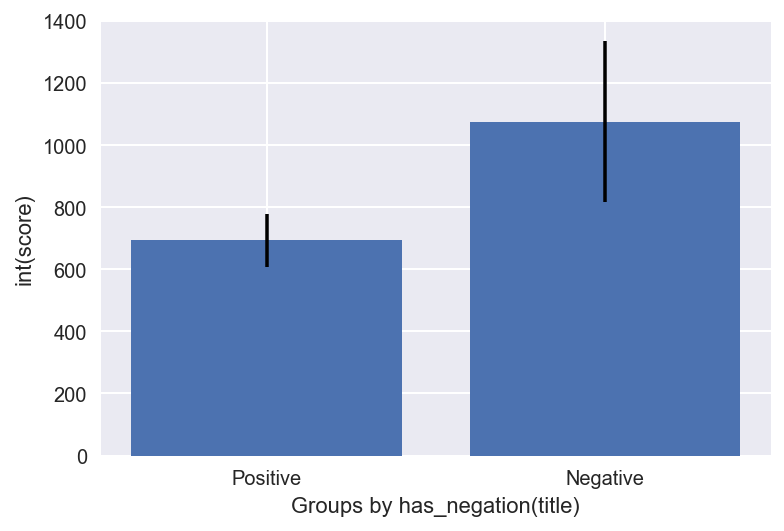

{'anova_f': 2.7201652797210691,
 'errors': [85.031207822053517, 258.49549441282244],
 'maxs': [27359, 19802],
 'means': [692.94834307992198, 1076.028735632184],
 'mins': [4, 5],
 'p-value': 0.099349919266750297,
 'sizes': [1026, 174],
 'vars': ['Positive', 'Negative']}


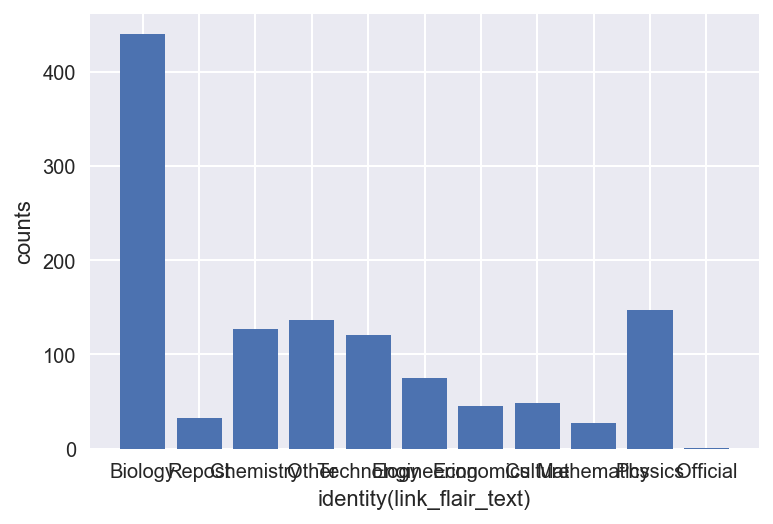

{'counts': [440, 32, 127, 137, 121, 75, 45, 48, 27, 147, 1]}


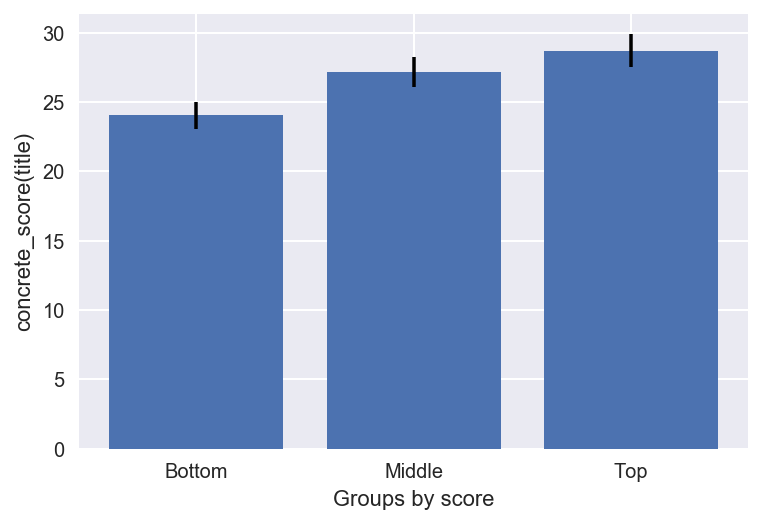

{'anova_f': 4.7878916243330059,
 'errors': [0.98882022621222088, 1.10535561182096, 1.1593381708005803],
 'maxs': [82.709999999999994, 88.150000000000034, 108.95],
 'means': [24.038749999999997, 27.15829166666667, 28.708381742738588],
 'mins': [0, 0, 1.5900000000000001],
 'p-value': 0.0085978316518109631,
 'sizes': [240, 240, 241]}


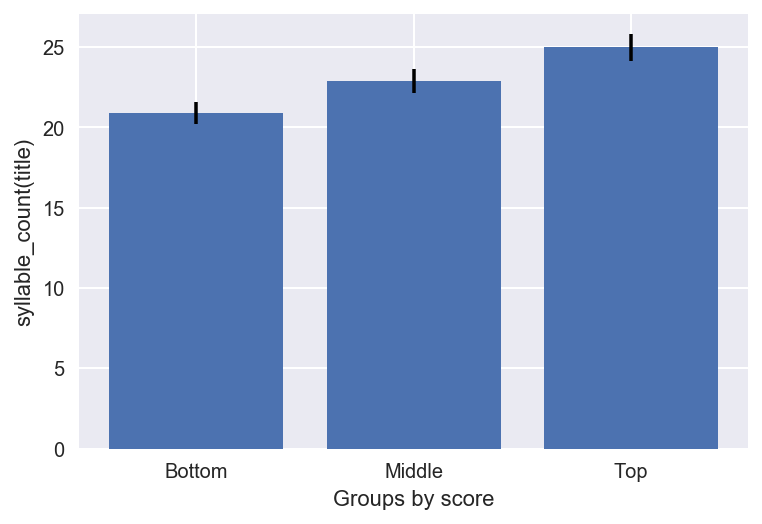

{'anova_f': 7.5387350796498351,
 'errors': [0.67557924936733527, 0.74110220114491698, 0.81315051344204548],
 'maxs': [63.0, 73.8, 81.9],
 'means': [20.879999999999995, 22.86375, 24.972199170124483],
 'mins': [4.5, 1.8, 6.3],
 'p-value': 0.00057526940584824303,
 'sizes': [240, 240, 241]}


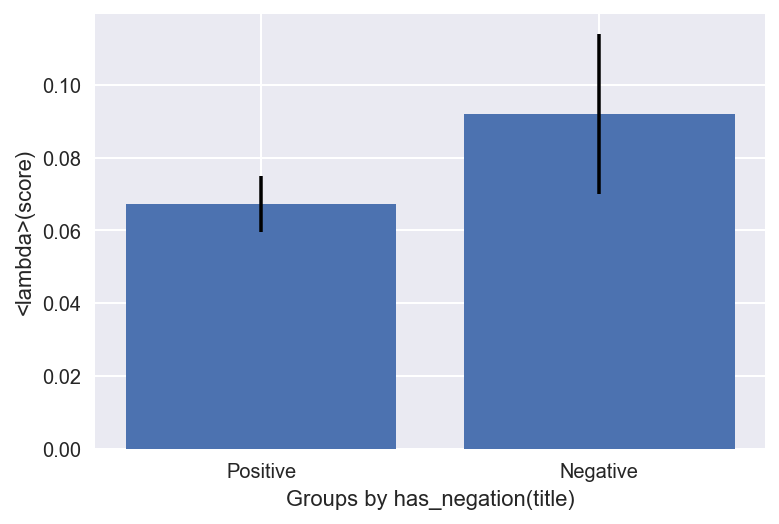

{'anova_f': 1.3786152489407808,
 'errors': [0.0078229620021175762, 0.02196930078853665],
 'maxs': [1, 1],
 'means': [0.06725146198830409, 0.091954022988505746],
 'mins': [0, 0],
 'p-value': 0.24057051236084021,
 'sizes': [1026, 174],
 'vars': ['Positive', 'Negative']}


In [8]:
# Simple Scatter
out = collected_posts.plot_post_scatter('title', 'score',
    textstat.syllable_count, compose(math.log, int))
pprint.pprint(out)

# Question Type Comparison
out = collected_posts.compare_groups(Q_TYPES, question_type,
    'title', 'score', int)
pprint.pprint(out)

# Negation Comparison
out = collected_posts.compare_groups(NEGATION, has_negation,
    'title', 'score', int)
pprint.pprint(out)

# Categorical Counts
out = collected_posts.categorical_counts('link_flair_text', identity)
pprint.pprint(out)

# Percentile Comparison
out = collected_posts.post_perc_groups(0.2, 'score', int, 'title',
    concrete_score)
pprint.pprint(out)

out = collected_posts.post_perc_groups(0.2, 'score', int, 'title', 
    textstat.syllable_count)
pprint.pprint(out)

# Negation Comparison (Binary)
out = collected_posts.compare_groups(NEGATION, has_negation,
    'title', 'score', lambda sc: is_viral(int(sc), VIRAL_THRESHOLD))
pprint.pprint(out)

## Randomness Testing 

In [9]:
# Utilities

def unix_to_week_time(time):
    date_obj = datetime.datetime.fromtimestamp(time)
    day_obj = date_obj.date()
    time_obj = date_obj.time()
    return day_obj.weekday() * 86400 + \
        time_obj.hour * 3600 + \
        time_obj.minute * 60 + \
        time_obj.second

def unix_to_day_time(time):
    date_obj = datetime.datetime.fromtimestamp(time)
    time_obj = date_obj.time()
    return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second


def unix_to_hour_time(time):
    date_obj = datetime.datetime.fromtimestamp(time)
    time_obj = date_obj.time()
    return time_obj.minute * 60 + time_obj.second

85 posts classified as viral with score greater than 2165.43102537


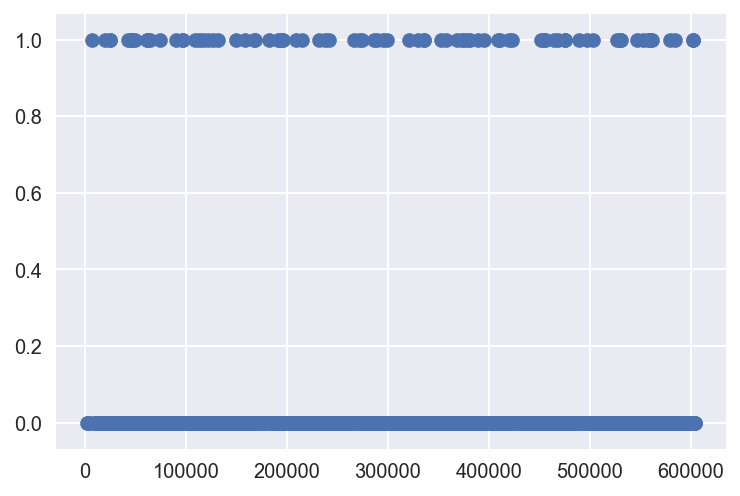

In [10]:
number = len([score for score in score_distribution if score > VIRAL_THRESHOLD])
print(number, 'posts classified as viral with score greater than', VIRAL_THRESHOLD)

times = [float(post['created_utc']) for post in collected_posts.posts]
viral = [int(int(post['score']) > VIRAL_THRESHOLD) for post in collected_posts.posts]


# Logistic Regression
plt.scatter(list(map(unix_to_week_time, times)), viral)
# plt.scatter(list(map(unix_to_hour_time, times)), viral)
# plt.scatter(list(map(unix_to_day_time, times)), viral)
plt.show()

# Export Template

In [27]:
EXPORT_LOC = '../private/output/export.csv'
export_pairs = sorted(raw_scores.items(), key=lambda pair: pair[1], reverse=True)
export_data = pd.DataFrame(export_pairs)
shuffled = export_data[[1, 0]]
shuffled.columns = ['title', 'score']
shuffled.to_csv(EXPORT_LOC)